In [59]:
"""The model helps automate predictions, such as estimating the remaining life of batteries,
which can be vital for applications like battery management in storage systems or electric vehicles"""

'The model helps automate predictions, such as estimating the remaining life of batteries,\nwhich can be vital for applications like battery management in storage systems or electric vehicles'

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [61]:
import pandas as pd
import numpy as np

In [62]:
data=pd.read_csv("C:/Users/Asus/Downloads/metadata.csv")
data.info

<bound method DataFrame.info of            type                                         start_time  \
0     discharge  [2010.       7.      21.      15.       0.    ...   
1     impedance  [2010.       7.      21.      16.      53.    ...   
2        charge  [2010.       7.      21.      17.      25.    ...   
3     impedance                    [2010    7   21   20   31    5]   
4     discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   
...         ...                                                ...   
7560  impedance  [2010.       9.      30.       7.      36.    ...   
7561  discharge  [2010.       9.      30.       8.       8.    ...   
7562     charge  [2010.      9.     30.      8.     48.     54.25]   
7563  discharge  [2010.       9.      30.      11.      50.    ...   
7564     charge  [2010.       9.      30.      12.      31.    ...   

      ambient_temperature battery_id  test_id   uid   filename  \
0                       4      B0047        0     1  00001.cs

In [63]:
try:
    data['start_time'] = pd.to_datetime(data['start_time'], errors='coerce')
except Exception as e:
    print(f"Error converting start_time: {e}")

In [64]:
# Drop columns that are irrelevant
df_cleaned = data.drop(['uid', 'filename'], axis=1)

In [65]:
# Handle missing values 
# Convert 'Re' to numeric, forcing errors to NaN
df_cleaned['Re'] = pd.to_numeric(df_cleaned['Re'], errors='coerce')

df_cleaned['Re'] = df_cleaned['Re'].fillna(df_cleaned['Re'].mean())
df_cleaned['Rct'] = pd.to_numeric(df_cleaned['Rct'], errors='coerce')
df_cleaned['Rct'] = df_cleaned['Rct'].fillna(df_cleaned['Rct'].mean())

In [66]:
print(df_cleaned.head())

        type start_time  ambient_temperature battery_id  test_id  \
0  discharge        NaT                    4      B0047        0   
1  impedance        NaT                   24      B0047        1   
2     charge        NaT                    4      B0047        2   
3  impedance        NaT                   24      B0047        3   
4  discharge        NaT                    4      B0047        4   

             Capacity            Re           Rct  
0  1.6743047446975208 -4.976500e+11  1.055903e+12  
1                 NaN  5.605783e-02  2.009702e-01  
2                 NaN -4.976500e+11  1.055903e+12  
3                 NaN  5.319186e-02  1.647340e-01  
4  1.5243662105099023 -4.976500e+11  1.055903e+12  


In [67]:
# Check data types
print(df_cleaned.dtypes)
print(df_cleaned[['Re', 'Rct']].isnull().sum())

type                           object
start_time             datetime64[ns]
ambient_temperature             int64
battery_id                     object
test_id                         int64
Capacity                       object
Re                            float64
Rct                           float64
dtype: object
Re     0
Rct    0
dtype: int64


In [68]:
# Replace '[]' with NaN
X = df_cleaned[['Re', 'Rct', 'Capacity', 'ambient_temperature']].replace(['[]'], None)
X = X.fillna(0)
y = df_cleaned['type'].replace(['[]'], 'unknown').fillna('unknown')

In [69]:
# Select features and target variable
X = df_cleaned[['Re', 'Rct', 'Capacity', 'ambient_temperature']]
y = df_cleaned['type'] 

In [70]:
X = X.apply(pd.to_numeric, errors='coerce')

In [71]:
# Ensure no missing values in selected features
X = X.fillna(0)  
y = y.fillna('unknown')

In [72]:
# Encode categorical target variable
y_encoded = pd.factorize(y)[0]

In [73]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [74]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [75]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       549
           1       1.00      1.00      1.00       411
           2       0.98      1.00      0.99       553

    accuracy                           0.99      1513
   macro avg       0.99      0.99      0.99      1513
weighted avg       0.99      0.99      0.99      1513



C:\Users\Asus\AppData\Local\Temp\ipykernel_2992\696720698.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned[['Re', 'Rct', 'Capacity', 'ambient_temperature']].corr()


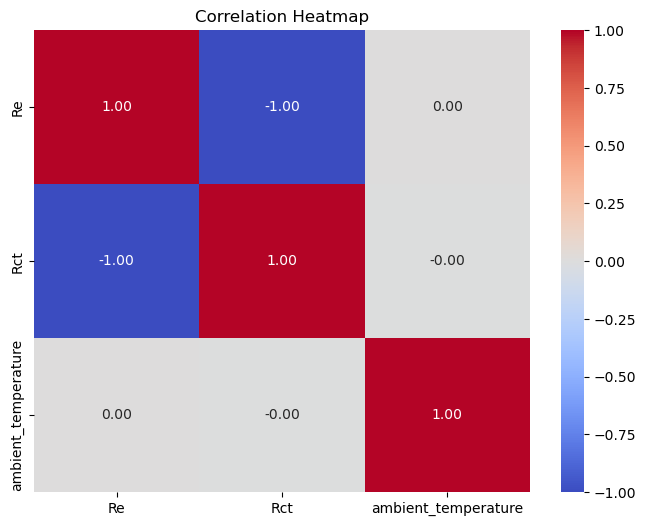

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df_cleaned[['Re', 'Rct', 'Capacity', 'ambient_temperature']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


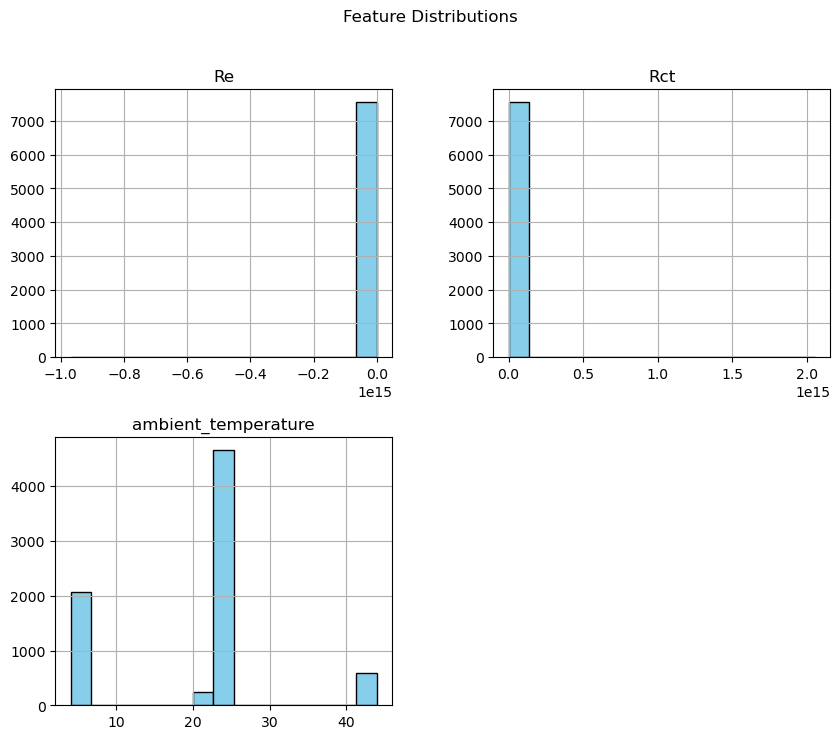

In [77]:
# Plot histograms for numeric features
df_cleaned[['Re', 'Rct', 'Capacity', 'ambient_temperature']].hist(bins=15, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


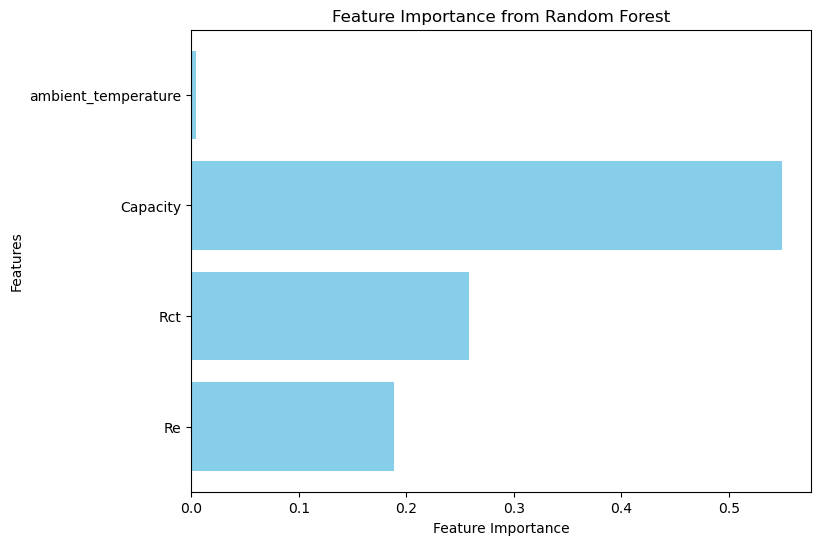

In [78]:
feature_importances = clf.feature_importances_
features = ['Re', 'Rct', 'Capacity', 'ambient_temperature']
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()


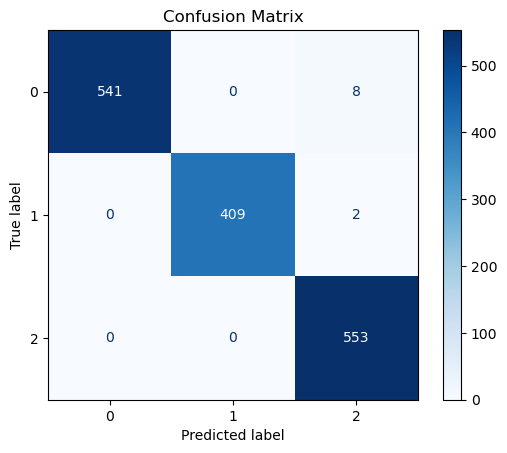

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
